<a href="https://colab.research.google.com/github/Sahar-bgi/python/blob/main/Flower_Image_Category_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [ ]:
from google.colab import files
# upload the Kaggle API
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saharbg","key":"006eacceccaefa95963d91f32fdf9597"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset

100% 241M/242M [00:02<00:00, 131MB/s]
100% 242M/242M [00:02<00:00, 111MB/s]


In [ ]:
!unzip 5-flower-types-classification-dataset.zip


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import cv2
import warnings
from pathlib import Path
import pandas as pd
from glob import glob
import warnings
warnings.filterwarnings("ignore")

In [ ]:
classes = os.listdir("/content/flower_images")
classes

['Tulip', 'Sunflower', 'Lilly', 'Lotus', 'Orchid']

In [ ]:
images_file = Path("/content/flower_images")

for c in classes:
  print(f' {c}', '=',len(os.listdir(os.path.join(images_file, c))), 'images')

 Tulip = 1000 images
 Sunflower = 1000 images
 Lilly = 1000 images
 Lotus = 1000 images
 Orchid = 1000 images


In [ ]:
#create a dataset to find number of files on  classes
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/flower_images")  # Directory path containing the image dataset

Found 4999 files belonging to 5 classes.


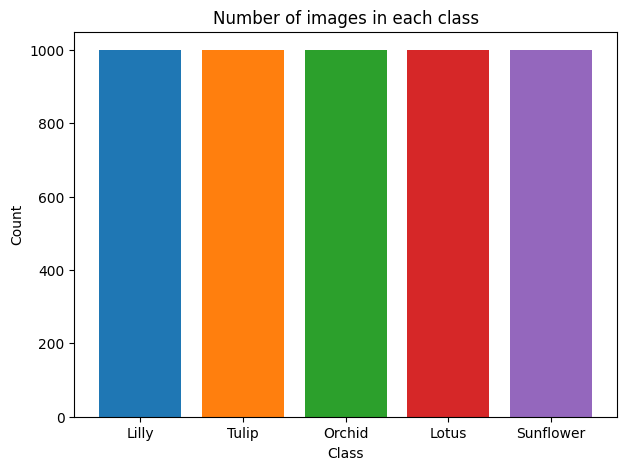

In [ ]:
import matplotlib.pyplot as plt


# An empty dictionary to store the count of images for each class
class_counts = {}

# Count the images in each class
for _, labels in dataset:
    for label in labels.numpy():
        class_name = classes[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

# a bar plot to visualize the count of images in each class
colors = plt.cm.tab10(range(len(class_counts)))
plt.figure(figsize=(7, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of images in each class', fontsize=12)
plt.show()

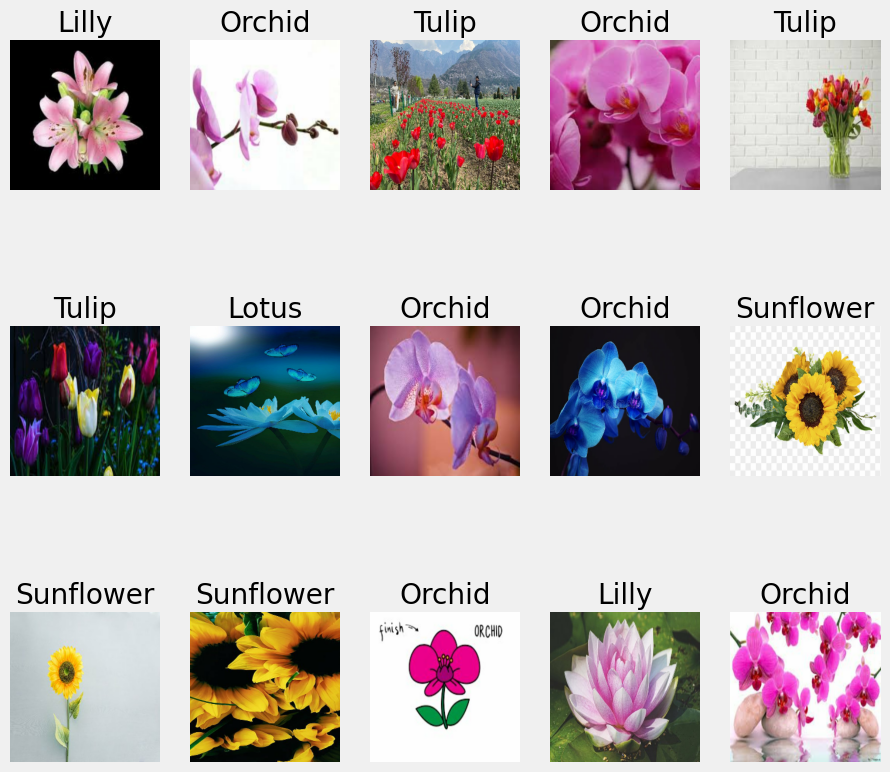

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Assuming you have a list of class names
class_names = ['Lilly', 'Lotus',  'Orchid', 'Sunflower','Tulip']

for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

plt.show()



In [ ]:
path = "/content/flower_images"

data = {"imgpath": [] , "labels": [] }

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path , folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)


df = pd.DataFrame(data)

In [ ]:
df

imgpath  labels
0      /content/flower_images/Tulip/3ab0d06b0d.jpg   Tulip
1      /content/flower_images/Tulip/6c3c0a7f3e.jpg   Tulip
2      /content/flower_images/Tulip/e9c0a30b47.jpg   Tulip
3      /content/flower_images/Tulip/e2c3cc40ca.jpg   Tulip
4      /content/flower_images/Tulip/f080401ac6.jpg   Tulip
...                                            ...     ...
4995  /content/flower_images/Orchid/c05e25b77a.jpg  Orchid
4996  /content/flower_images/Orchid/39cc612320.jpg  Orchid
4997  /content/flower_images/Orchid/c8889d6ec9.jpg  Orchid
4998  /content/flower_images/Orchid/766f9c9e0d.jpg  Orchid
4999  /content/flower_images/Orchid/c06bc10e2b.jpg  Orchid

[5000 rows x 2 columns]

In [ ]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())

print("---------------------------------------")
print("Number of images per category : ")
print(df.labels.value_counts())

Shape of the dataset:  (5000, 2)
_______________________________________
Number of null values: 
imgpath    0
labels     0
dtype: int64
_______________________________________
Number of unique values: 
imgpath    5000
labels        5
dtype: int64
---------------------------------------
Number of images per category : 
Tulip        1000
Sunflower    1000
Lilly        1000
Lotus        1000
Orchid       1000
Name: labels, dtype: int64


In [ ]:
plt.style.use('ggplot')
Tulip_file=glob('/content/flower_images/Tulip/*.jpg')
Lotus_file = glob('/content/flower_images/Lotus/*.jpg')
Sunflower_file=glob('/content/flower_images/Sunflower/*.jpg')
Orchid_file = glob('/content/flower_images/Orchid/*.jpg')
Lilly_file = glob('/content/flower_images/Lilly/*.jpg')


In [ ]:
img_mp1=plt.imread(Lilly_file[20])
img_cv2=cv2.imread(Lilly_file[20])
img_mp1.shape,img_cv2.shape

((360, 480, 3), (360, 480, 3))

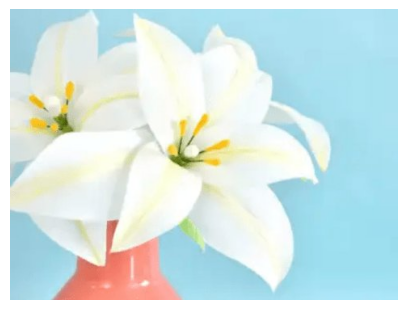

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

In [ ]:
img_mp1=plt.imread(Lotus_file[10])
img_cv2=cv2.imread(Lotus_file[10])
img_mp1.shape,img_cv2.shape

((168, 300, 3), (168, 300, 3))

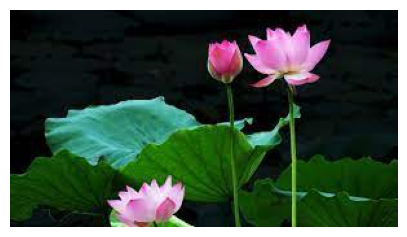

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

In [ ]:
img_mp1=plt.imread(Orchid_file[10])
img_cv2=cv2.imread(Orchid_file[10])
img_mp1.shape,img_cv2.shape

((1517, 1000, 3), (1517, 1000, 3))

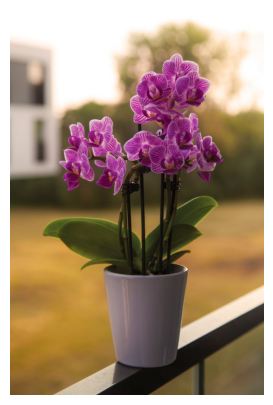

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

In [ ]:
img_mp1=plt.imread(Sunflower_file[10])
img_cv2=cv2.imread(Sunflower_file[10])
img_mp1.shape,img_cv2.shape

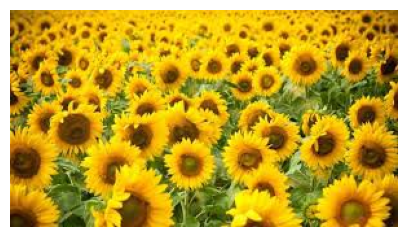

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

In [ ]:
img_mp1=plt.imread(Tulip_file[10])
img_cv2=cv2.imread(Tulip_file[10])
img_mp1.shape,img_cv2.shape

((183, 275, 3), (183, 275, 3))

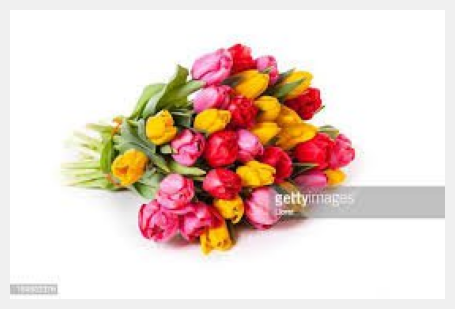

In [ ]:
fig, ax=plt.subplots(figsize=(5,5))
ax.imshow(img_mp1)
ax.axis('off')
plt.show()

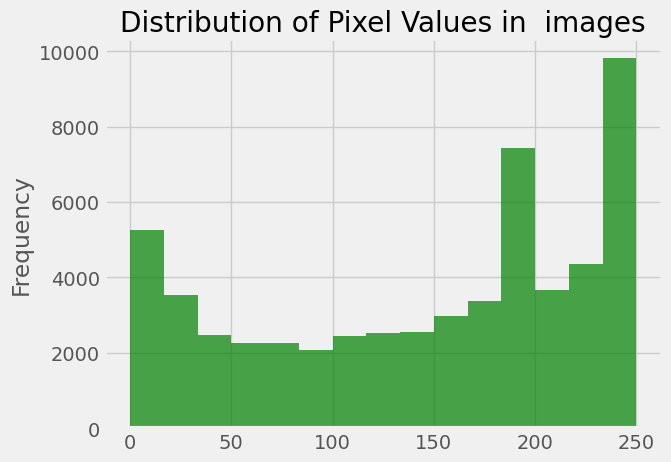

In [ ]:
pd.Series(img_mp1.flatten()).plot(kind='hist',bins=15,range=[0,250],title='Distribution of Pixel Values in  images',color='green',alpha=0.7)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

from glob import glob
import cv2
import os
  # initialize lists to store images and labels
  # Define paths to  image folders
  #['Lilly', 'Lotus', 'Orchid', 'Sunflower','Tulip']
Lilly_file = '/content/flower_images/Lilly'
Lotus_file = '/content/flower_images/Lotus'
Orchid_file = '/content/flower_images/Orchid'
Sunflower_file='/content/flower_images/Sunflower'
Tulip_file='/content/flower_images/Tulip'


images = []
labels = []

# Define a dictionary to map class names to labels
class_mapping = {'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}

  # load and preprocess Lilly images
for filename in os.listdir(Lilly_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Lilly_file, filename))
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(class_mapping['Lilly']) # 0 represents Lilly


   # load and preprocess Lotus images
for filename in os.listdir(Lotus_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Lotus_file, filename))
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(class_mapping['Lotus']) # 1 represents Lotus


   # load and preprocess Orchid images
for filename in os.listdir(Orchid_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Orchid_file, filename))
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(class_mapping['Orchid']) # 2 represents Orchid


     # load and preprocess Sunflower images
for filename in os.listdir(Sunflower_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Sunflower_file, filename))
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
         # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(class_mapping['Sunflower']) # 3 represents Sunflower


# load and preprocess Tulip images

for filename in os.listdir(Tulip_file):
    if filename.endswith('.jpg'):
        original_img = cv2.imread(os.path.join(Tulip_file, filename))
        img = cv2.resize(original_img, (128,128))
        # Noramlize pixel value to [0 1]
        img = img.astype(np.float32) / 255.0
        #Make images gray
       # img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # Sharpen Image
        kernel_sharpening = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel_sharpening)
        images.append(img)
        labels.append(class_mapping['Tulip']) # 4 represents Tulip


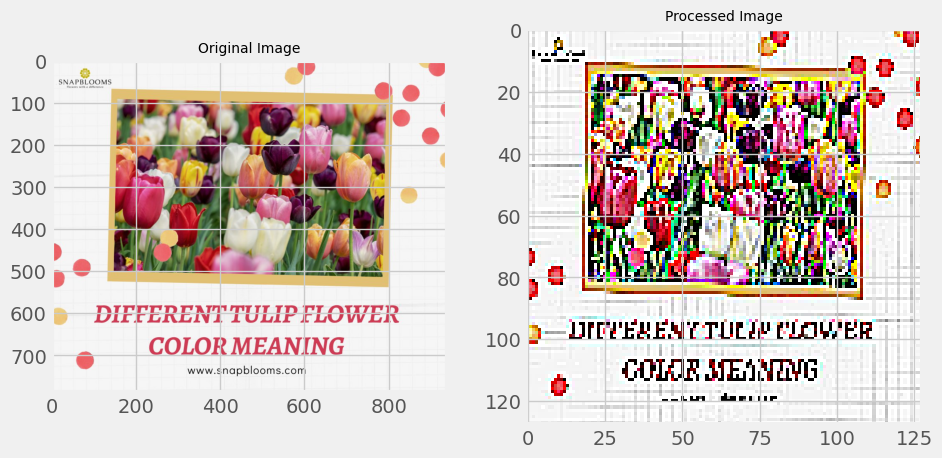

In [ ]:
 # Display the original, resized, , normalized , Sharpen and grayed  images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image',fontsize=10)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Processed Image',fontsize=10)
plt.show()

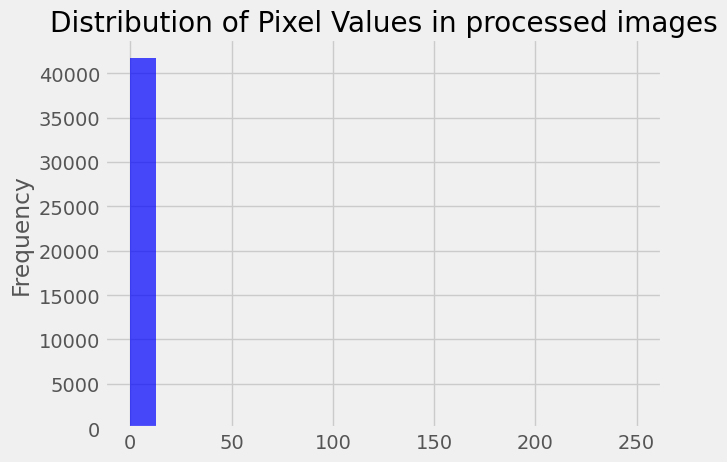

In [ ]:
pd.Series(img.flatten()).plot(kind='hist',bins=20,range=[0,250],title='Distribution of Pixel Values in processed images',color='blue',alpha=0.7)
plt.show()

In [ ]:
# convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
# split the data into trainig and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(3999, 128, 128, 3)
(1000, 128, 128, 3)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model1 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 28800)             0         
                                                                 
 dense_51 (Dense)            (None, 64)              

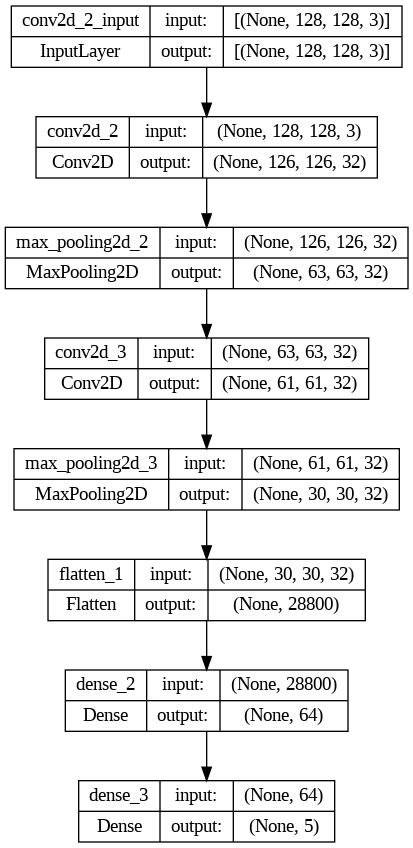

In [ ]:
# model architecture display
tf.keras.utils.plot_model(model1,show_shapes=True,expand_nested=True)

In [ ]:
#train the model1
history = model1.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 72s 707ms/step - loss: 1.5911 - accuracy: 0.3170 - val_loss: 1.3118 - val_accuracy: 0.4288
Epoch 2/5
100/100 [==============================] - 78s 787ms/step - loss: 1.1130 - accuracy: 0.5477 - val_loss: 1.0387 - val_accuracy: 0.5850
Epoch 3/5
100/100 [==============================] - 71s 711ms/step - loss: 0.7784 - accuracy: 0.7133 - val_loss: 0.8808 - val_accuracy: 0.6950
Epoch 4/5
100/100 [==============================] - 71s 703ms/step - loss: 0.4686 - accuracy: 0.8506 - val_loss: 0.8315 - val_accuracy: 0.7337
Epoch 5/5
100/100 [==============================] - 78s 775ms/step - loss: 0.2322 - accuracy: 0.9365 - val_loss: 0.8871 - val_accuracy: 0.7475


In [ ]:
#evaluate the model1
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 7s - loss: 0.8463 - accuracy: 0.7410 - 7s/epoch - 225ms/step
Test accuracy:0.7409999966621399


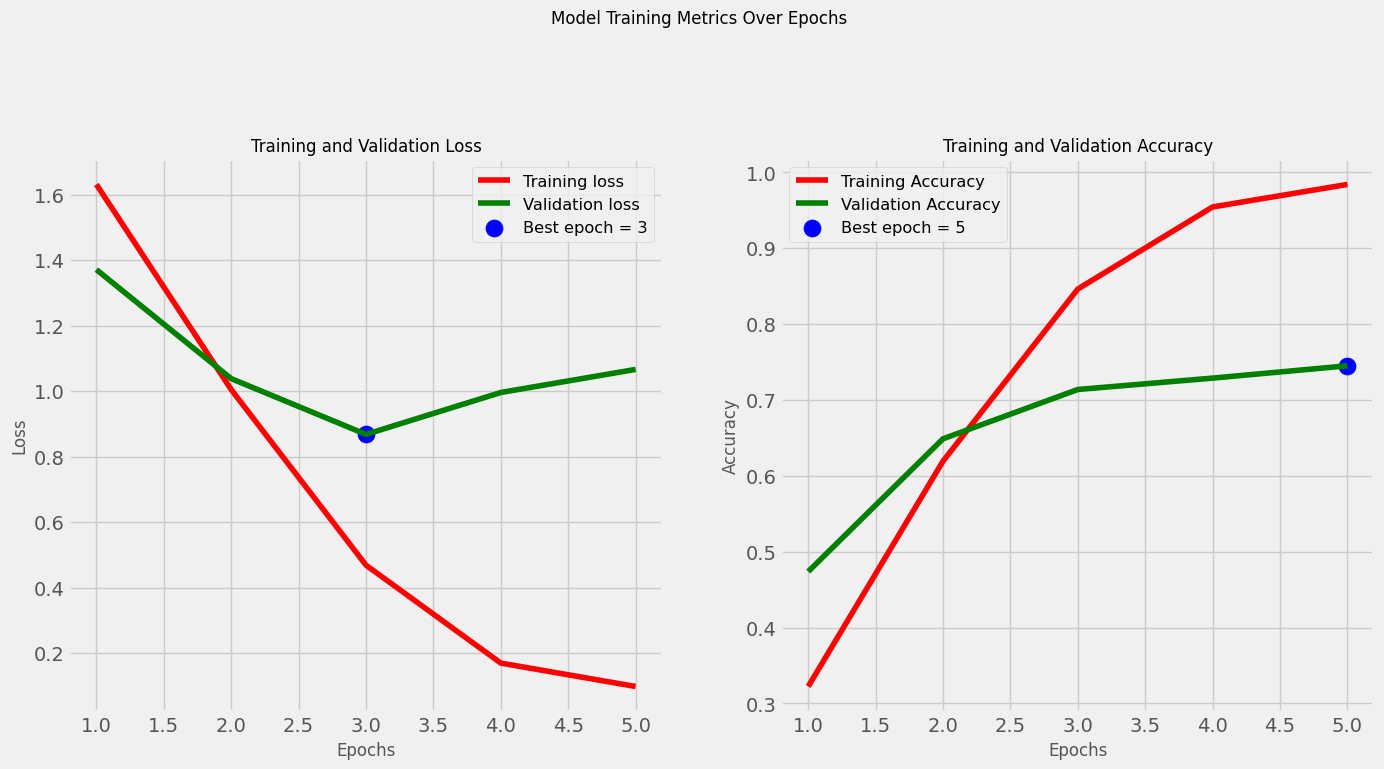

In [ ]:
Epochs=5
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

plt.figure(figsize=(15, 15))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)


plt.suptitle('Model Training Metrics Over Epochs', fontsize=12)
plt.show()

1/1 [==============================] - 0s 93ms/step


Predicted class: Tulip
Actual class: Lilly


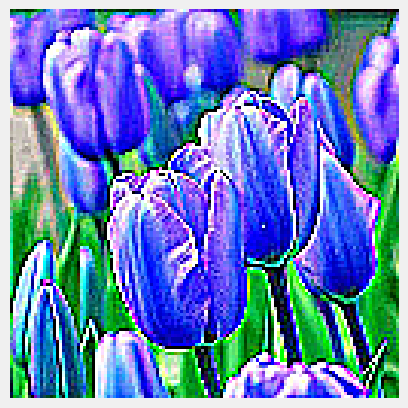

In [ ]:
#predicting on a single image
sample_image_index = 4
sample_image = x_test[sample_image_index]
predictions = model1.predict(np.expand_dims(sample_image,axis=0))
predicted_label = np.argmax(predictions)
# dataset's class labels
#class_labels = ['Tulip', 'Lotus',  'Orchid', 'Sunflower','Lilly']
class_labels = ['Lilly', 'Lotus',  'Orchid', 'Sunflower','Tulip']
predicted_class = class_labels[predicted_label]
actual_class = class_labels[labels[sample_image_index]]  # Use the index directly
print(f'Predicted class: {predicted_class}')
print(f'Actual class: {actual_class}')
# display the sample image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []

# Repeat through the test data
for i in range(len(x_test)):
    # Make predictions using model.predict
    predictions = model1.predict(np.expand_dims(x_test[i], axis=0))
    predicted_class_number = np.argmax(predictions)

    # Append true and predicted labels to the lists
    true_labels.append(y_test[i])
    predicted_labels.append(predicted_class_number)

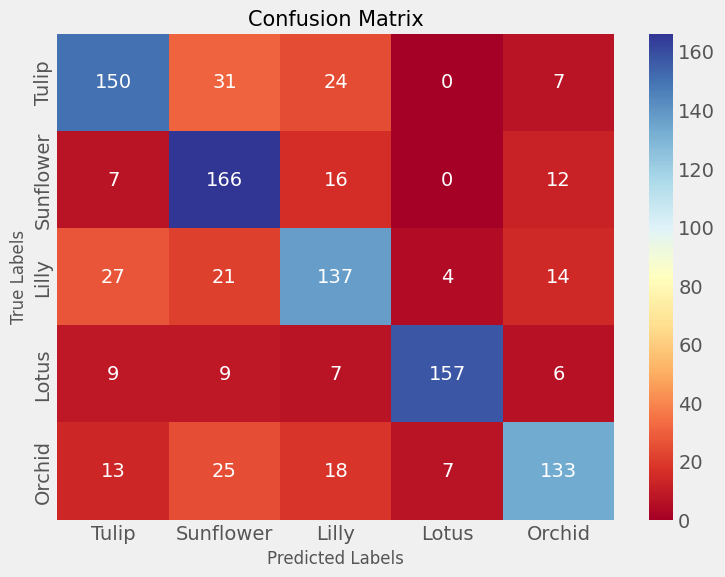

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels",fontsize=12)
plt.ylabel("True Labels",fontsize=12)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow import keras


# Make predictions on the test set
y_pred = np.argmax(model1.predict(x_test), axis=1)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')


32/32 [==============================] - 6s 190ms/step
Precision: 0.7517
Recall: 0.7430
F1-score: 0.7443
Accuracy: 0.7430


In [ ]:
#Model 2
model2 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),# New layer with 32 filters added
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'), # New layer with 64 filters added
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),# New layer with 64 filters added
    layers.Dense(5,activation = 'softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)       

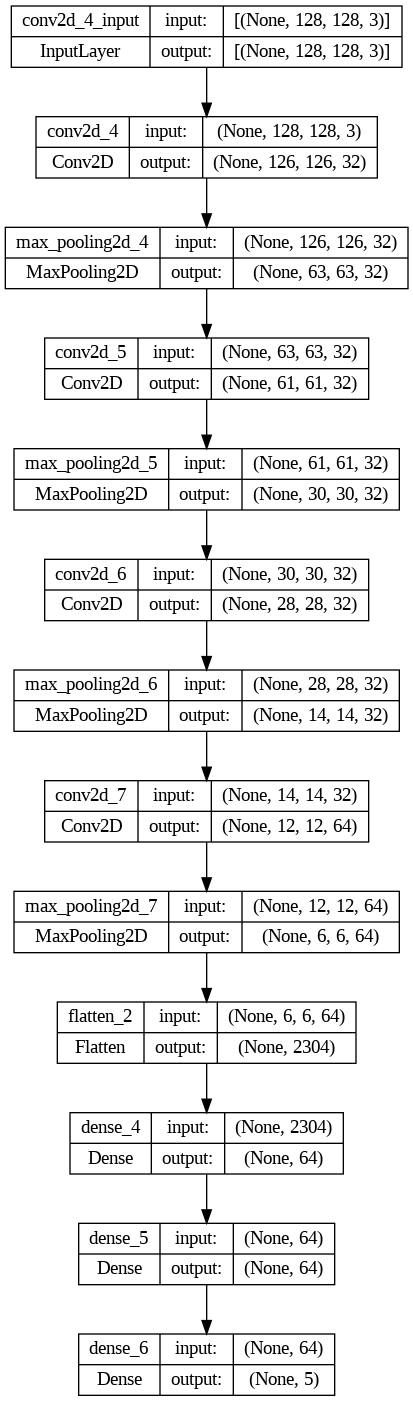

In [ ]:
# model architecture display
tf.keras.utils.plot_model(model2,show_shapes=True,expand_nested=True)

In [ ]:
#train the model2
history = model2.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 103s 1s/step - loss: 1.4215 - accuracy: 0.3692 - val_loss: 1.2493 - val_accuracy: 0.4700
Epoch 2/5
100/100 [==============================] - 83s 830ms/step - loss: 1.1488 - accuracy: 0.5292 - val_loss: 1.0500 - val_accuracy: 0.5838
Epoch 3/5
100/100 [==============================] - 75s 755ms/step - loss: 0.9799 - accuracy: 0.6130 - val_loss: 1.0953 - val_accuracy: 0.5850
Epoch 4/5
100/100 [==============================] - 72s 724ms/step - loss: 0.8370 - accuracy: 0.6711 - val_loss: 0.9633 - val_accuracy: 0.6137
Epoch 5/5
100/100 [==============================] - 72s 717ms/step - loss: 0.7152 - accuracy: 0.7296 - val_loss: 0.8044 - val_accuracy: 0.6938


In [ ]:
#evaluate the model2
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 6s - loss: 0.7838 - accuracy: 0.7050 - 6s/epoch - 181ms/step
Test accuracy:0.7049999833106995


In [ ]:
model3 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)       

In [ ]:
#train the model3
history = model3.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 107s 1s/step - loss: 1.3917 - accuracy: 0.3723 - val_loss: 1.1958 - val_accuracy: 0.4512
Epoch 2/5
100/100 [==============================] - 109s 1s/step - loss: 1.1241 - accuracy: 0.5495 - val_loss: 1.0871 - val_accuracy: 0.5900
Epoch 3/5
100/100 [==============================] - 105s 1s/step - loss: 0.9865 - accuracy: 0.6074 - val_loss: 0.9539 - val_accuracy: 0.6137
Epoch 4/5
100/100 [==============================] - 108s 1s/step - loss: 0.8651 - accuracy: 0.6618 - val_loss: 0.8799 - val_accuracy: 0.6550
Epoch 5/5
100/100 [==============================] - 105s 1s/step - loss: 0.7332 - accuracy: 0.7237 - val_loss: 0.7826 - val_accuracy: 0.7150


In [ ]:
#evaluate the model3
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 8s - loss: 0.8333 - accuracy: 0.7040 - 8s/epoch - 237ms/step
Test accuracy:0.7039999961853027


In [ ]:
model4 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)       

In [ ]:
#train the model4
history = model4.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 78s 762ms/step - loss: 1.4656 - accuracy: 0.3260 - val_loss: 1.2487 - val_accuracy: 0.4263
Epoch 2/5
100/100 [==============================] - 72s 720ms/step - loss: 1.1362 - accuracy: 0.5317 - val_loss: 1.0393 - val_accuracy: 0.5813
Epoch 3/5
100/100 [==============================] - 76s 766ms/step - loss: 0.9168 - accuracy: 0.6446 - val_loss: 0.8925 - val_accuracy: 0.6662
Epoch 4/5
100/100 [==============================] - 80s 800ms/step - loss: 0.6097 - accuracy: 0.7734 - val_loss: 0.8130 - val_accuracy: 0.7050
Epoch 5/5
100/100 [==============================] - 75s 748ms/step - loss: 0.3467 - accuracy: 0.8815 - val_loss: 0.8141 - val_accuracy: 0.7513


In [ ]:
#evaluate the model4
test_loss, test_acc = model4.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 6s - loss: 0.8058 - accuracy: 0.7250 - 6s/epoch - 181ms/step
Test accuracy:0.7250000238418579


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 57600)             0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [ ]:
#train the model5
history = model5.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 97s 962ms/step - loss: 1.9140 - accuracy: 0.2720 - val_loss: 1.3751 - val_accuracy: 0.4563
Epoch 2/5
100/100 [==============================] - 95s 947ms/step - loss: 1.0365 - accuracy: 0.6005 - val_loss: 0.9585 - val_accuracy: 0.6325
Epoch 3/5
100/100 [==============================] - 98s 976ms/step - loss: 0.5210 - accuracy: 0.8218 - val_loss: 0.8822 - val_accuracy: 0.6837
Epoch 4/5
100/100 [==============================] - 94s 938ms/step - loss: 0.1937 - accuracy: 0.9487 - val_loss: 0.9321 - val_accuracy: 0.7375
Epoch 5/5
100/100 [==============================] - 104s 1s/step - loss: 0.0663 - accuracy: 0.9869 - val_loss: 1.1585 - val_accuracy: 0.7487


In [ ]:
#evaluate the model5
test_loss, test_acc = model5.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 7s - loss: 1.0527 - accuracy: 0.7660 - 7s/epoch - 204ms/step
Test accuracy:0.765999972820282


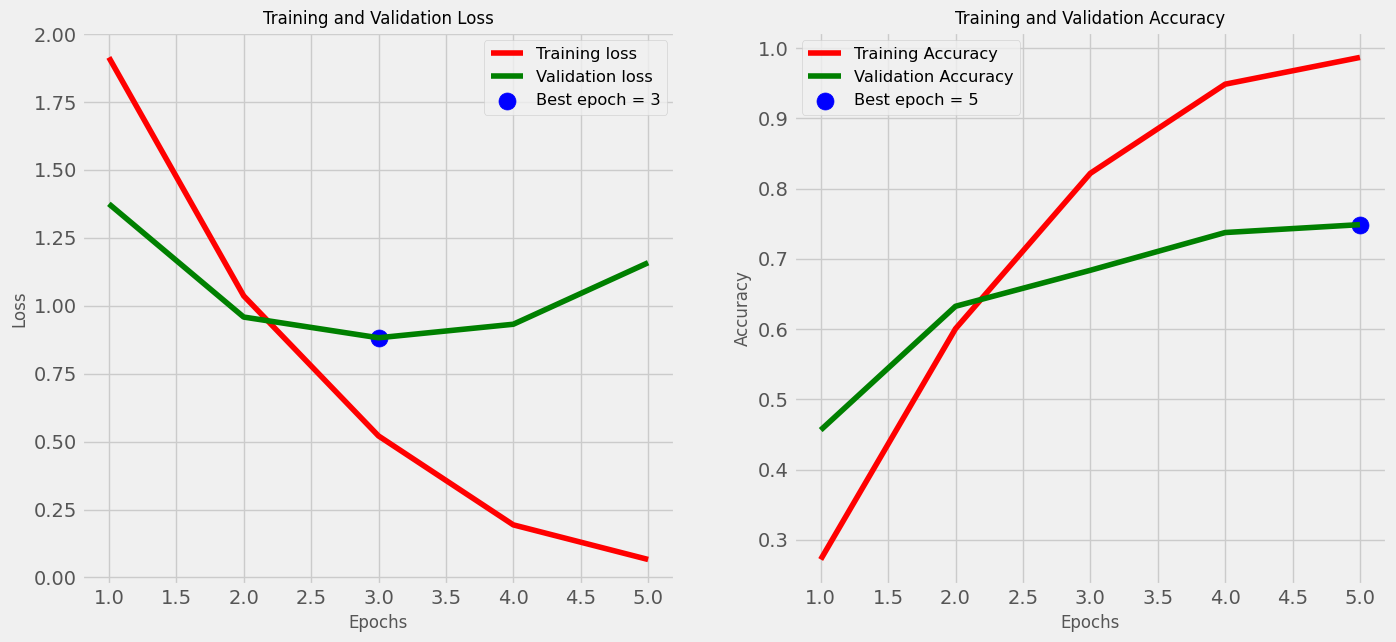

In [ ]:
Epochs=5
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

plt.figure(figsize=(15, 15))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []

# Repeat through the test data
for i in range(len(x_test)):
    # Make predictions using model.predict
    predictions = model5.predict(np.expand_dims(x_test[i], axis=0))
    predicted_class_number = np.argmax(predictions)

    # Append true and predicted labels to the lists
    true_labels.append(y_test[i])
    predicted_labels.append(predicted_class_number)

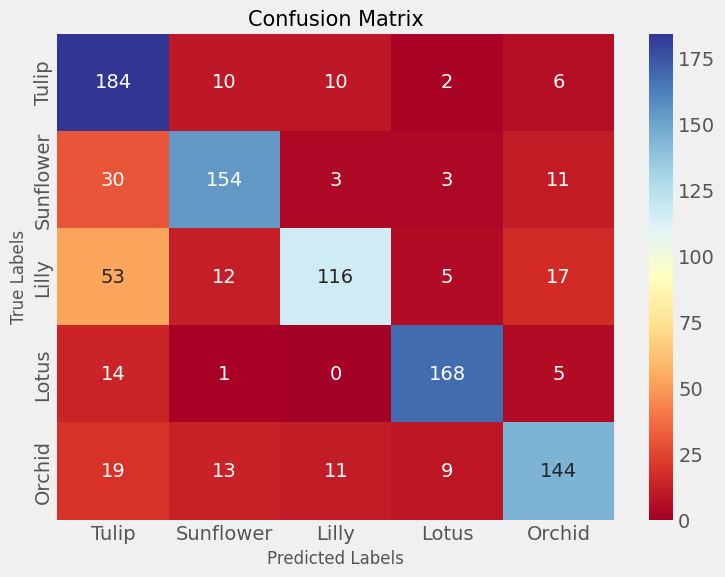

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels",fontsize=12)
plt.ylabel("True Labels",fontsize=12)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow import keras


# Make predictions on the test set
y_pred = np.argmax(model5.predict(x_test), axis=1)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

32/32 [==============================] - 13s 385ms/step
Precision: 0.7843
Recall: 0.7660
F1-score: 0.7654
Accuracy: 0.7660


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model6 = keras.Sequential([
    layers.Conv2D(64,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 115200)            0         
                                                                 
 dense_17 (Dense)            (None, 256)              

In [ ]:
#train the model
history = model6.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 320s 3s/step - loss: 0.0710 - accuracy: 0.9834 - val_loss: 1.2318 - val_accuracy: 0.7400
Epoch 2/5
100/100 [==============================] - 290s 3s/step - loss: 0.0298 - accuracy: 0.9956 - val_loss: 1.4544 - val_accuracy: 0.7475
Epoch 3/5
100/100 [==============================] - 293s 3s/step - loss: 0.0300 - accuracy: 0.9966 - val_loss: 1.4325 - val_accuracy: 0.7500
Epoch 4/5
100/100 [==============================] - 292s 3s/step - loss: 0.0259 - accuracy: 0.9962 - val_loss: 1.3550 - val_accuracy: 0.7600
Epoch 5/5
100/100 [==============================] - 316s 3s/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 1.4748 - val_accuracy: 0.7638


In [ ]:
#evaluate the model
test_loss, test_acc = model6.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 20s - loss: 1.5462 - accuracy: 0.7470 - 20s/epoch - 614ms/step
Test accuracy:0.746999979019165


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model7 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 28800)             0         
                                                                 
 dense_19 (Dense)            (None, 64)               

In [ ]:
#train the model - with 10 epochs
history = model7.fit(x_train, y_train,epochs=10,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/10
100/100 [==============================] - 74s 736ms/step - loss: 1.8445 - accuracy: 0.2610 - val_loss: 1.5076 - val_accuracy: 0.3800
Epoch 2/10
100/100 [==============================] - 72s 721ms/step - loss: 1.2688 - accuracy: 0.4698 - val_loss: 1.1319 - val_accuracy: 0.5550
Epoch 3/10
100/100 [==============================] - 74s 739ms/step - loss: 0.7939 - accuracy: 0.7152 - val_loss: 0.9477 - val_accuracy: 0.6637
Epoch 4/10
100/100 [==============================] - 72s 724ms/step - loss: 0.4029 - accuracy: 0.8728 - val_loss: 0.8530 - val_accuracy: 0.7287
Epoch 5/10
100/100 [==============================] - 67s 670ms/step - loss: 0.1900 - accuracy: 0.9494 - val_loss: 0.9625 - val_accuracy: 0.7475
Epoch 6/10
100/100 [==============================] - 75s 751ms/step - loss: 0.0835 - accuracy: 0.9837 - val_loss: 1.3275 - val_accuracy: 0.7362
Epoch 7/10
100/100 [==============================] - 73s 735ms/step - loss: 0.0471 - accuracy: 0.9916 - val_loss: 1.1680 - val_ac

In [ ]:
#evaluate the model - with 10 epochs
test_loss, test_acc = model7.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 15s - loss: 1.3500 - accuracy: 0.7520 - 15s/epoch - 475ms/step
Test accuracy:0.7519999742507935


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model8 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 57600)             0         
                                                                 
 dense_23 (Dense)            (None, 128)             

In [ ]:
#train the model - with 10 epochs
history = model8.fit(x_train, y_train,epochs=10,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/10
100/100 [==============================] - 101s 990ms/step - loss: 2.0114 - accuracy: 0.2279 - val_loss: 1.6033 - val_accuracy: 0.2438
Epoch 2/10
100/100 [==============================] - 101s 1s/step - loss: 1.3654 - accuracy: 0.4367 - val_loss: 1.0692 - val_accuracy: 0.6025
Epoch 3/10
100/100 [==============================] - 93s 929ms/step - loss: 0.6634 - accuracy: 0.7727 - val_loss: 0.9397 - val_accuracy: 0.6762
Epoch 4/10
100/100 [==============================] - 94s 947ms/step - loss: 0.1963 - accuracy: 0.9437 - val_loss: 1.0717 - val_accuracy: 0.7475
Epoch 5/10
100/100 [==============================] - 90s 899ms/step - loss: 0.0712 - accuracy: 0.9853 - val_loss: 1.1892 - val_accuracy: 0.7362
Epoch 6/10
100/100 [==============================] - 97s 970ms/step - loss: 0.0412 - accuracy: 0.9937 - val_loss: 1.1089 - val_accuracy: 0.7663
Epoch 7/10
100/100 [==============================] - 95s 948ms/step - loss: 0.0229 - accuracy: 0.9966 - val_loss: 1.2327 - val_acc

In [ ]:
#evaluate the model - with 10 epochs
test_loss, test_acc = model8.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 7s - loss: 1.0737 - accuracy: 0.7700 - 7s/epoch - 205ms/step
Test accuracy:0.7699999809265137


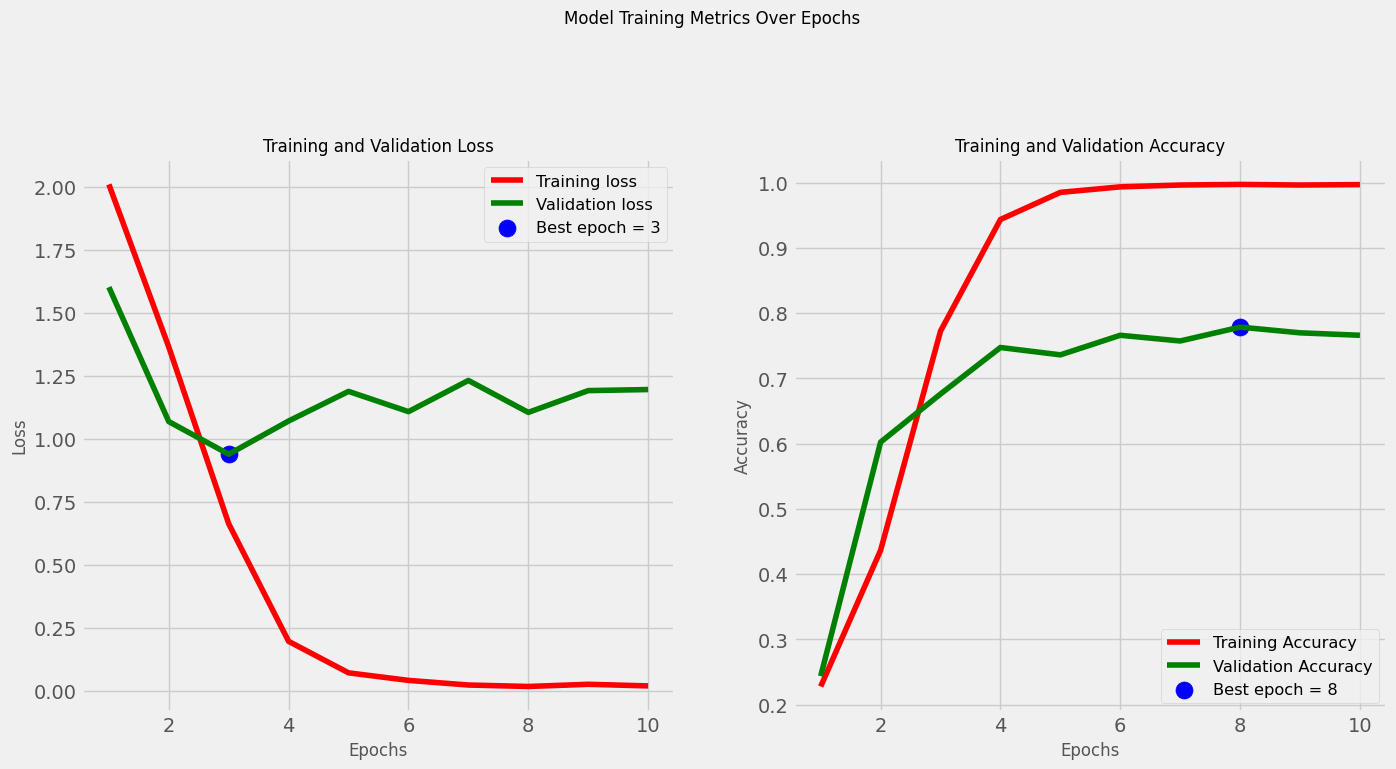

In [ ]:
Epochs=10
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

plt.figure(figsize=(15, 15))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)


plt.suptitle('Model Training Metrics Over Epochs', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []

# Repeat through the test data
for i in range(len(x_test)):
    # Make predictions using model.predict
    predictions = model8.predict(np.expand_dims(x_test[i], axis=0))
    predicted_class_number = np.argmax(predictions)

    # Append true and predicted labels to the lists
    true_labels.append(y_test[i])
    predicted_labels.append(predicted_class_number)

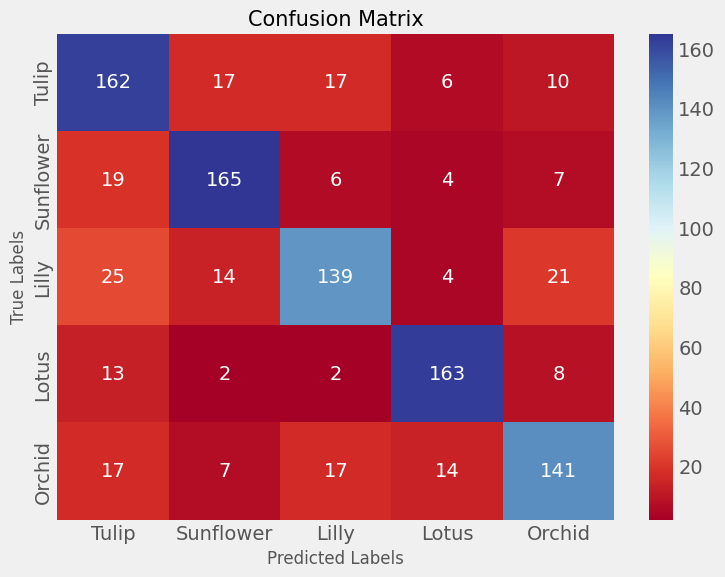

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdYlBu", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels",fontsize=12)
plt.ylabel("True Labels",fontsize=12)
plt.title("Confusion Matrix",fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow import keras


# Make predictions on the test set
y_pred = np.argmax(model8.predict(x_test), axis=1)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

32/32 [==============================] - 8s 265ms/step
Precision: 0.7714
Recall: 0.7700
F1-score: 0.7697
Accuracy: 0.7700


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model9 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(5,activation = 'sigmoid')
])
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 57600)             0         
                                                                 
 dense_29 (Dense)            (None, 128)             

In [ ]:
#train the model
history = model9.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 109s 1s/step - loss: 1.8702 - accuracy: 0.2832 - val_loss: 1.4178 - val_accuracy: 0.3762
Epoch 2/5
100/100 [==============================] - 98s 984ms/step - loss: 1.1646 - accuracy: 0.5495 - val_loss: 1.0786 - val_accuracy: 0.6100
Epoch 3/5
100/100 [==============================] - 101s 1s/step - loss: 0.5652 - accuracy: 0.8184 - val_loss: 0.9362 - val_accuracy: 0.6725
Epoch 4/5
100/100 [==============================] - 98s 981ms/step - loss: 0.1723 - accuracy: 0.9547 - val_loss: 1.0373 - val_accuracy: 0.7225
Epoch 5/5
100/100 [==============================] - 101s 1s/step - loss: 0.0645 - accuracy: 0.9872 - val_loss: 1.3454 - val_accuracy: 0.7212


In [ ]:
#evaluate the model
test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 8s - loss: 1.2429 - accuracy: 0.7170 - 8s/epoch - 259ms/step
Test accuracy:0.7170000076293945


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model10 = keras.Sequential([
    layers.Conv2D(32,(3,3), activation = 'sigmoid', input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'sigmoid'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation = 'sigmoid'),
    layers.Dense(5,activation = 'sigmoid')
])
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 57600)             0         
                                                                 
 dense_31 (Dense)            (None, 128)             

In [ ]:
#train the model
history = model10.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 165s 2s/step - loss: 2.2347 - accuracy: 0.2007 - val_loss: 1.6169 - val_accuracy: 0.1988
Epoch 2/5
100/100 [==============================] - 122s 1s/step - loss: 1.6139 - accuracy: 0.2082 - val_loss: 1.6146 - val_accuracy: 0.2025
Epoch 3/5
100/100 [==============================] - 111s 1s/step - loss: 1.6114 - accuracy: 0.2001 - val_loss: 1.6178 - val_accuracy: 0.1850
Epoch 4/5
100/100 [==============================] - 106s 1s/step - loss: 1.6164 - accuracy: 0.1844 - val_loss: 1.6149 - val_accuracy: 0.2025
Epoch 5/5
100/100 [==============================] - 107s 1s/step - loss: 1.6149 - accuracy: 0.2035 - val_loss: 1.6122 - val_accuracy: 0.2062


In [ ]:
#evaluate the model
test_loss, test_acc = model10.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 14s - loss: 1.6153 - accuracy: 0.1960 - 14s/epoch - 427ms/step
Test accuracy:0.19599999487400055


In [ ]:
model_json = model.to_json()

# Write the file name of the model

with open("Flower Classification.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("Flower Classification.h5")
print("Saved Flower Classification to disk")



Saved Flower Classification to disk


In [ ]:
#train the model
history = model11.fit(x_train, y_train,epochs=5,batch_size= 32,verbose=1,validation_split=0.2)

Epoch 1/5
100/100 [==============================] - 75s 740ms/step - loss: 1.4242 - accuracy: 0.3614 - val_loss: 1.2914 - val_accuracy: 0.4725
Epoch 2/5
100/100 [==============================] - 72s 726ms/step - loss: 1.0999 - accuracy: 0.5530 - val_loss: 1.0559 - val_accuracy: 0.5813
Epoch 3/5
100/100 [==============================] - 72s 723ms/step - loss: 0.8988 - accuracy: 0.6518 - val_loss: 0.9725 - val_accuracy: 0.6363
Epoch 4/5
100/100 [==============================] - 73s 731ms/step - loss: 0.6987 - accuracy: 0.7312 - val_loss: 0.9466 - val_accuracy: 0.6550
Epoch 5/5
100/100 [==============================] - 69s 695ms/step - loss: 0.4820 - accuracy: 0.8268 - val_loss: 0.8721 - val_accuracy: 0.7125


In [ ]:
#evaluate the model
test_loss, test_acc = model11.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy:{test_acc}')

32/32 - 8s - loss: 0.8433 - accuracy: 0.7180 - 8s/epoch - 241ms/step
Test accuracy:0.7179999947547913


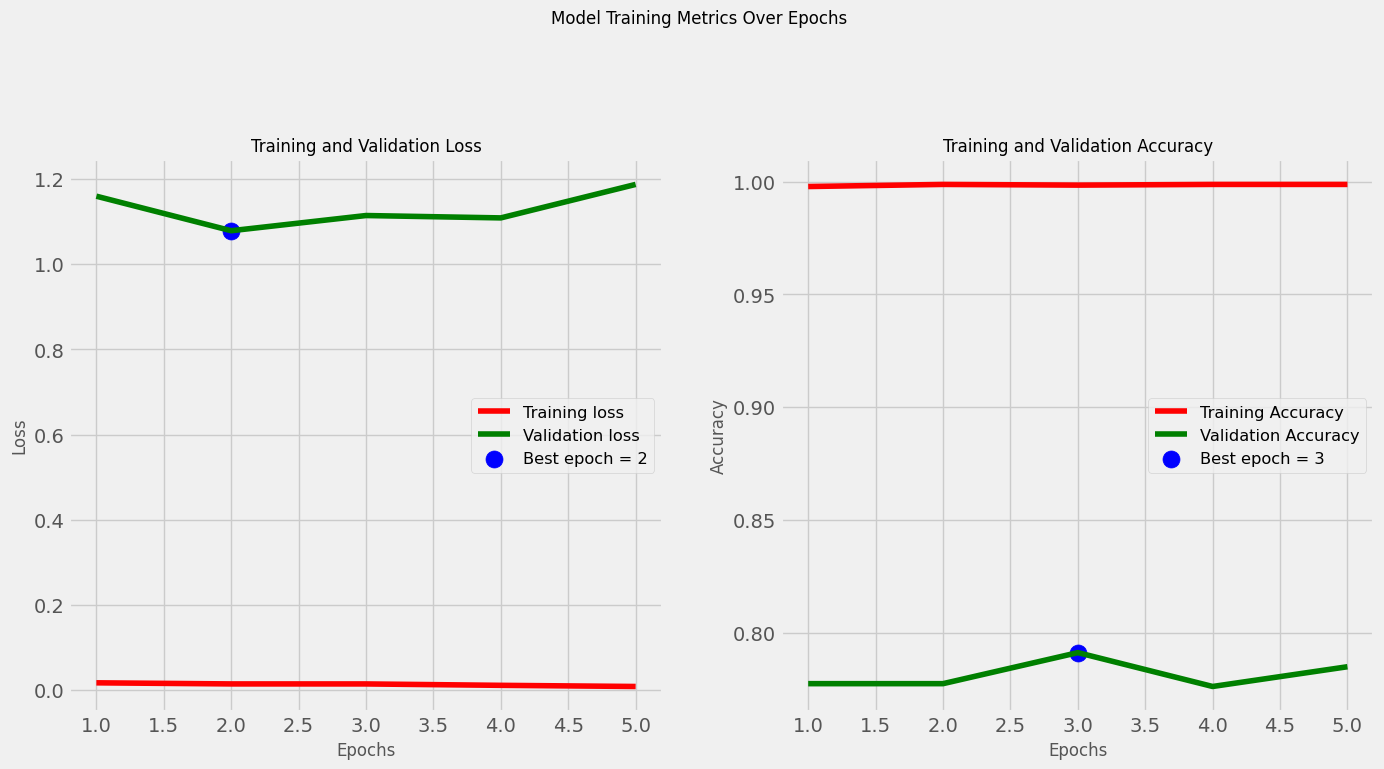

In [ ]:
Epochs=5
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]


Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'Best epoch = {str(index_loss + 1)}'
acc_label = f'Best epoch = {str(index_acc + 1)}'

plt.figure(figsize=(15, 15))
plt.style.use('fivethirtyeight')

plt.subplot(2, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(fontsize='small')
plt.grid(True)


plt.suptitle('Model Training Metrics Over Epochs', fontsize=12)
plt.show()

1/1 [==============================] - 0s 122ms/step


Predicted class: Orchid
Actual class: Lilly


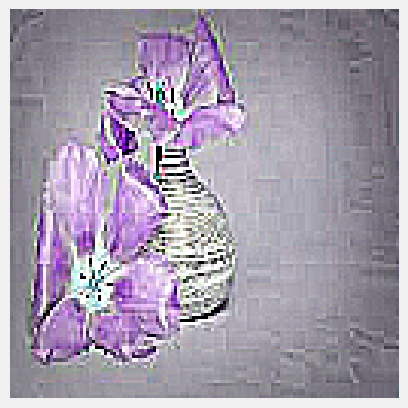

In [ ]:

sample_image_index =38
sample_image = x_test[sample_image_index]
predictions = model8.predict(np.expand_dims(sample_image,axis=0))
predicted_label = np.argmax(predictions)
class_labels = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
predicted_class = class_labels[predicted_label]
actual_class = class_labels[labels[sample_image_index]]  # Use the index directly
print(f'Predicted class: {predicted_class}')
print(f'Actual class: {actual_class}')
# display the sample image
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

true_labels = []
predicted_labels = []

# Repeat through the test data
for i in range(len(x_test)):
    # Make predictions using model.predict
    predictions = model10.predict(np.expand_dims(x_test[i], axis=0))
    predicted_class_number = np.argmax(predictions)

    # Append true and predicted labels to the lists
    true_labels.append(y_test[i])
    predicted_labels.append(predicted_class_number)

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


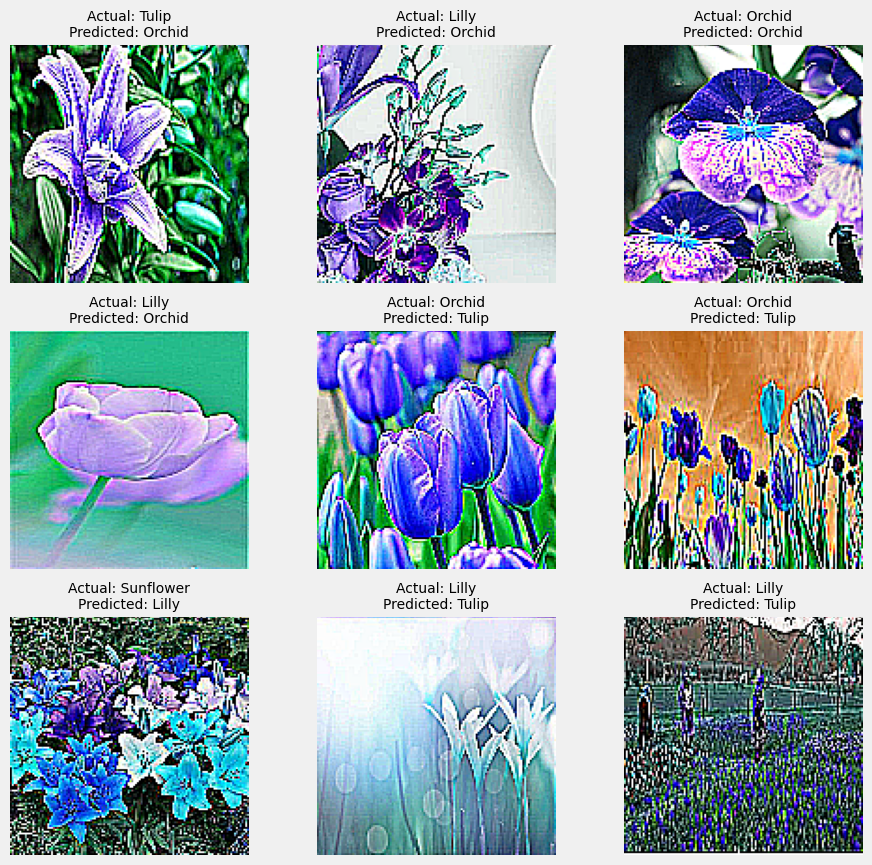

In [ ]:
plt.figure(figsize=(10, 10))

# some images  visualization
for i in range(9):
    image = x_test[i]
    label = label_batch[i]
    ax = plt.subplot(3, 3, i + 1)
    image_for_prediction = np.expand_dims(image, axis=0)
    predictions = model8.predict(image_for_prediction)
    predicted_label = np.argmax(predictions)
    class_labels = ['Lilly', 'Lotus','Orchid', 'Sunflower','Tulip' ]
    predicted_class = class_labels[predicted_label]
    actual_class = classes[label]

    plt.imshow(image)
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}",fontsize=10)
    plt.axis("off")

plt.show()